In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from skimage.io import imread,imsave,imshow
import cv2
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
from tqdm import tqdm_notebook as tqdm

In [4]:
trn = Path('../train')
trn_rsz = Path('../train_rsz')
tst = Path('../test')
tst_rsz = Path('../test_rsz')

lbl_fish = Path('../fish/lbl_fish')
lbl_flow = Path('../flow/lbl_flow')
lbl_grav = Path('../grav/lbl_grav')
lbl_sug  = Path('../sug/lbl_sug')

lbl_fish_rsz = Path('../fish/lbl_fish_rsz')
lbl_flow_rsz = Path('../flow/lbl_flow_rsz')
lbl_grav_rsz = Path('../grav/lbl_grav_rsz')
lbl_sug_rsz  = Path('../sug/lbl_sug_rsz')

In [5]:
fls = [fl for fl in trn.iterdir() if fl.is_file()]

In [6]:
len(fls)

5546

In [7]:
df = pd.read_csv('../train.csv')

In [8]:
df.sample(5)

,Image_Label,EncodedPixels
20675,ee0ba55.jpg_Sugar,1879544 550 1880095 99 1880944 650 1882344 650...
20587,ed1b813.jpg_Sugar,1208202 231 1209602 1 1209604 1 1209606 1 1209...
20351,eaad219.jpg_Sugar,NaN
12724,91270c9.jpg_Fish,28081 294 29481 294 30881 294 32281 294 33681 ...
10066,72b19fa.jpg_Gravel,273428 712 274146 3 274153 11 274169 8 274828 ...


In [33]:
fls[5]

PosixPath('../fish/lbl_fish/907f1ba.png')

In [40]:
img = imread('../fish/lbl_fish/1c25e19.png')

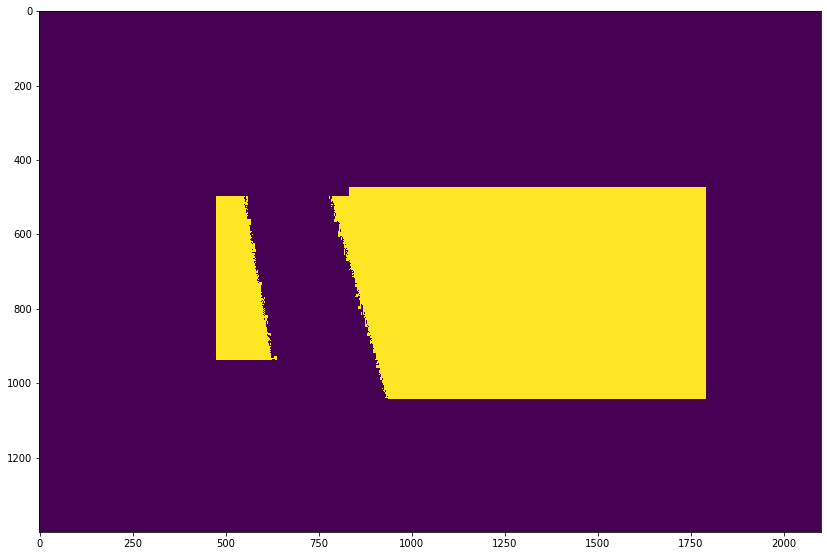

In [41]:
fig = plt.figure(figsize=(14,21))
plt.imshow(img)

In [42]:
np.unique(img)

Array([0, 1], dtype=uint8)

In [45]:
_ = cv2.resize(img,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_NEAREST)
np.unique(_)

array([0, 1], dtype=uint8)

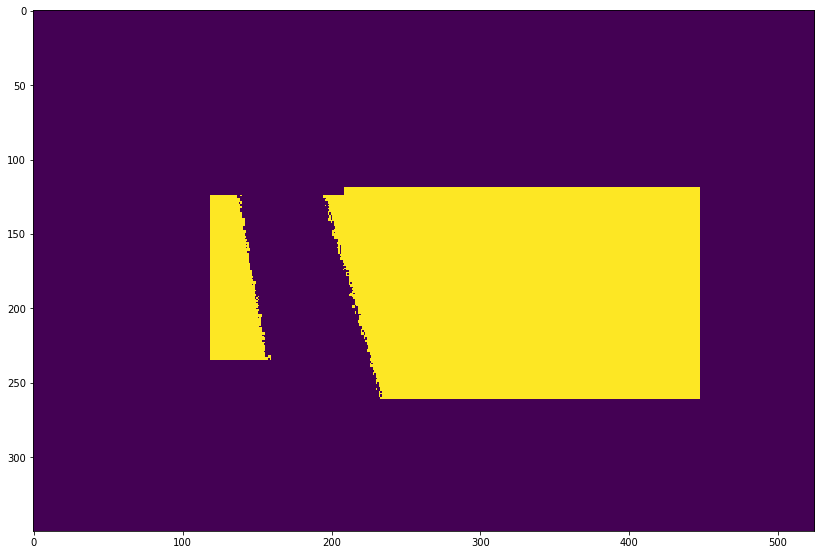

In [46]:
fig = plt.figure(figsize=(14,21))
plt.imshow(_)

In [18]:
len(np.unique(_))

2

In [19]:
warnings.filterwarnings("ignore")

In [20]:
fls[0]

PosixPath('../train/f1da432.jpg')

In [65]:
# train
for fl in tqdm(fls):
    img = imread(fl)
    img_rsz = cv2.resize(img,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_LANCZOS4)
    imsave(trn_rsz/(fl.stem+'.png'),img_rsz)

In [47]:
# fish labels
fls = [fl for fl in lbl_fish.iterdir() if fl.is_file()]
for fl in tqdm(fls):
    img = imread(fl)
    img_rsz = cv2.resize(img,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_NEAREST)
    imsave(lbl_fish_rsz/fl.name,img_rsz)

In [48]:
fls = [fl for fl in lbl_flow.iterdir() if fl.is_file()]
for fl in tqdm(fls):
    img = imread(fl)
    img_rsz = cv2.resize(img,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_NEAREST)
    imsave(lbl_flow_rsz/fl.name,img_rsz)

In [49]:
fls = [fl for fl in lbl_grav.iterdir() if fl.is_file()]
for fl in tqdm(fls):
    img = imread(fl)
    img_rsz = cv2.resize(img,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_NEAREST)
    imsave(lbl_grav_rsz/fl.name,img_rsz)

In [50]:
fls = [fl for fl in lbl_sug.iterdir() if fl.is_file()]
for fl in tqdm(fls):
    img = imread(fl)
    img_rsz = cv2.resize(img,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_NEAREST)
    imsave(lbl_sug_rsz/fl.name,img_rsz)

In [76]:
fls = [fl for fl in tst.iterdir() if fl.is_file()]
for fl in tqdm(fls):
    img = imread(fl)
    img_rsz = cv2.resize(img,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_LANCZOS4)
    imsave(tst_rsz/(fl.stem+'.png'),img_rsz)